In [ ]:
pip install scipy


In [ ]:
import scipy
from scipy import integrate
result,error=integrate.quad(lambda x:x**2,0,1)
print("result",result)
print("error",error)

result 0.33333333333333337
error 3.700743415417189e-15


In [ ]:
#lambda funtion in python
square=lambda x:x**2
print(square(4))

16


In [ ]:
import numpy as np
from scipy import optimize
result_optimize=optimize.minimize_scalar(lambda x:x**2 + 3*x + 5)
print("optimised result",result_optimize)

optimised result  message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 2.75
       x: -1.5000000000000002
     nit: 4
    nfev: 8


1)f(x)=ax^2+bx+c
2)min func=-b/2a
3)x=independent
4)y=dependent
5)any two points we will consider=(x1,y1),(x2,y2)
6)formula=y1+((x-x1)(y2-y1))/(x2-x1)  #//x is the target variable



interpolation result 2.0


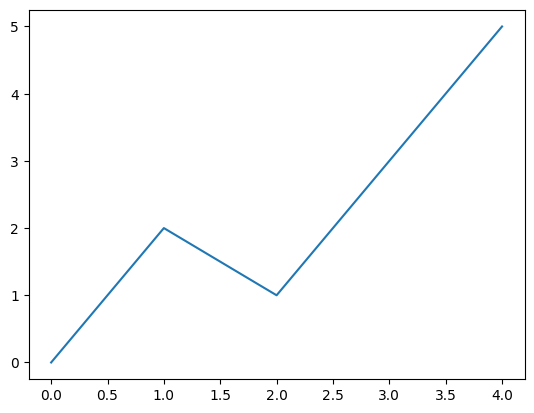

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
#interpolation
x_data=np.array([0,1,2,3,4])
y_data=np.array([0,2,1,3,5])
interp_func=interpolate.interp1d(x_data,y_data,kind="linear")
interp_func=interp_func(2.5)
print("interpolation result",interp_func)
plt.plot(x_data,y_data)

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
#generate sample data
np.random.seed(0)
data=pd.DataFrame({
    'treatment':np.random.choice(['A','B','C'],size=100),
    'score':np.random.normal(loc=10 ,scale=2, size=100)  #loc is mean ,scale is std  ,size is no of values or rows
    })
print(data)

   treatment      score
0          A   8.626821
1          B  10.029747
2          A   9.248668
3          B   9.923553
4          B  10.735949
..       ...        ...
95         A   9.933528
96         C  10.131283
97         A  10.531571
98         B  12.303684
99         C  10.276086

[100 rows x 2 columns]


In [ ]:
import random
random.seed(0)
print(random.random())
print(random.random())


0.8444218515250481
0.7579544029403025


In [ ]:
#hypothesis testing (t-test)
group_A=data[data['treatment']=='A']['score']
group_B=data[data['treatment']=='B']['score']
group_C=data[data['treatment']=='C']['score']
t_stat,p_value=stats.ttest_ind(group_A, group_B)
print("t-statistic:",t_stat)
print("p-value:",p_value)

t-statistic: -1.0341676575352792
p-value: 0.3045674995802033


1)this example code t-test. to compare there mean value of two groups
2)select scores from group a it filters the data,dataframe to include only rows.where the treatment coloum is A then select the score column
t-test:stats.ttest_ind (performs on independent samples t-test that means to sample test to compare the mean value)
t_stat:(variable that stores the t_statistical mean of the two groups relative to the variation with in the group)
p-value:(variable stores p-value it consists of probalibility of observing the given result(less or more or extreme) under the null hypothesis

In [ ]:
data1=data['treatment']
data2=data['score'].mean()
print(data1)
print(data2)

0     A
1     B
2     A
3     B
4     B
     ..
95    A
96    C
97    A
98    B
99    C
Name: treatment, Length: 100, dtype: object
9.885027355938945


     hospital      staff
0   17.292157  13.766301
1   13.200472   7.304482
2   14.936214   7.459030
3   18.722680  11.938793
4   17.602674   7.653753
..        ...        ...
95  14.119720   9.656907
96  12.031500  11.543581
97  17.357611  11.647008
98  12.380736  14.326472
99  13.205968  12.673056

[100 rows x 2 columns]


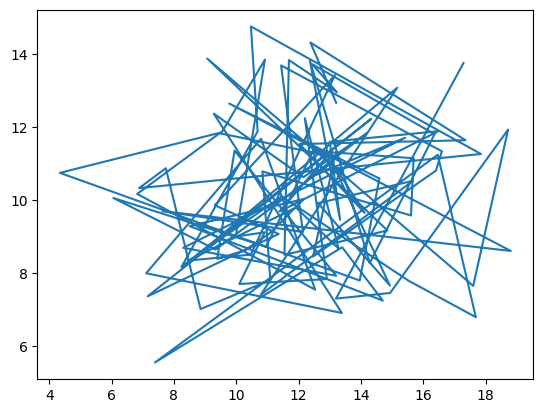

In [ ]:
np.random.seed(0)
data1=pd.DataFrame({
    'hospital':np.random.normal(loc=12,scale=3,size=100),
    'staff':np.random.normal(loc=10 ,scale=2 ,size=100)
                  })

print(data1)
plt.plot(data1['hospital'],data1['staff'])


In [ ]:
#anova (one-way anova)
f_stat,p_value=stats.f_oneway(data[data['treatment']=='A']['score'],
                              data[data['treatment']=='B']['score'],
                              data[data['treatment']=='C']['score'])
print("f_statistics",f_stat)
print("p_values",p_value)

f_statistics 0.6019178068930898
p_values 0.5497930622874936


1)scores extraction for separate treatment category
2)stats.f_oneway:(performs oneway processor for anava testing)
formula(x)=mean value addition with standard deviation and finally standard deviation with multiple value of(target variable)
3)it is a operation performing two or more groups to determine of values of statistically significant or not
4)this testing is extension of hypothesis testing it allowing comparision of mean value across multiple groups simaltaneously

step1:null hypothesis(same data)

step2:alternative hypothesis(atleast one group mean is different from others)

step-3:assumption
1)independent observations,data point with in each group or independent of each other
2)normality(each group data follows the normal distribution)
3)homogenuity of variance :the variances of data of each group are equal

anova testing for statistical analysis:
1)f_stat:it is calculated based on the ratio of the between group variability to their with in the group variability
if the f_static is larger that means greater than expected null hypothesis it suggests the group means are not equal there are significant different b/w the groups

p_value:probality of observing the given result[normal result,extream result]under the assumption null hypothhesis which is equal to true
a small p_value(value less than 0.05 it suggested that the difference blw group mean value are unlikely to have occured by chance alone,leading to their rejection of null hypothesis

1)u will receive
2)based on the p_value you can determine wheather there are significant differences b/w the means of the three groups
3)if the p_value less than the significance level is 0.05.u will reject the null hypothesis value and conclude that there are significance result there are one pair of group means.otherwise u failed the reject the null hypothesis




regression analysis(simple linear regression)
1)preparing the data
2)treatment variable is converted from a categorical data two numerical format
3)sm.add_constant()
4)intersect-constant value(it will allow the model to estimate the intersept parameter)
5)sm.OLS-ordinary least square it will define OLS for regression model
6)(data['score])(response variable)it representing the tests course
7)the predict of variable(represent the treatment of group)


for fitting the model:
regressionm model to the data it will fit coefficients(slope and intercept)by using OLS method
1)ols is the function of states model
step-1:sampledata(x,y) independent and dependent variable and adding a constant intercept _independent variable-array[x]
it is necessary for the estimated for intercept parameter in tne linear regeression model ols regression it takes dependent variable &independent variable x(input)
OLS model producing including intercepts

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
# Combine all data into a single array
all_data = np.concatenate([group_A, group_B, group_C])

# Create labels for groups
labels = ['Group_A'] * len(group_A) + ['Group_B'] * len(group_B) + ['Group_C'] * len(group_C)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_data, labels, alpha=0.05)

# Print pairwise comparisons
print(tukey_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Group_A Group_B   0.4881 0.5599 -0.6399  1.616  False
Group_A Group_C   0.3994 0.7101 -0.8041  1.603  False
Group_B Group_C  -0.0886 0.9842 -1.3279 1.1506  False
-----------------------------------------------------


In [ ]:
#REGISTRATION ANALYSIS (SIMPLE LINEAR REGRESSION)
X=sm.add_constant(data['treatment'].replace({'A':0,'B':1,'C':2}))
model=sm.OLS(data['score'], X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7559
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.387
Time:                        09:09:12   Log-Likelihood:                -210.90
No. Observations:                 100   AIC:                             425.8
Df Residuals:                      98   BIC:                             431.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6932      0.299     32.452      0.0

In [ ]:
import numpy as np
import statsmodels.api as sm

# Sample data
X = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# Add a constant to the independent variable (for intercept estimation)
X = sm.add_constant(X)

# Create OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print summary of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.124
Time:                        09:30:05   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
